In [1]:
# %matplotlib
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
# Generate data with of prescribed sparsity of weights
def gendata(n, d, s):
  th = 1 - s / d
  w = np.random.rand(d, 1)
  w = np.maximum(w - th, 0)
  w = w + (w > 0) * th
  X = 2 * np.random.rand(n, d) - 1
  z = X @ w
  y = np.sign(z)
  X = -X * y / np.mean(abs(z))
  return X, w

In [3]:
# L1 & L2 regularized logistic loss
def loss(z, w, l1, l2):
  loss = np.mean(np.log1p(np.exp(z)))
  loss += l1 * np.sum(abs(w))
  loss += 0.5 * l2 * np.sum(w * w)
  return loss

In [4]:
# GD with L1 & L2 regularization
def proxgd(X, eta, l1, l2):
  w = np.zeros((X.shape[1], 1))
  ls = []
  for e in range(len(eta)):
    et = eta[e]
    z = X @ w
    ls.append(loss(z, w, l1, l2))
    q = 1 / (1 + np.exp(-z))
    w = w - et * np.mean(X * q, axis=0, keepdims=True).T
    if l1 > 0:
      w = np.sign(w) * np.maximum(abs(w) - et * l1, 0)
    if l2 > 0:
      w = w / (1 + et * l2)
  return w, ls

In [5]:
epc = 200
n = 200
d = 21
s = 7
X, w = gendata(n, d, s)

In [6]:
eta = 1.0 * np.ones(epc)
u1, ls1 = proxgd(X, eta, 0.03, 0)
u2, ls2 = proxgd(X, eta, 0, 0.06)

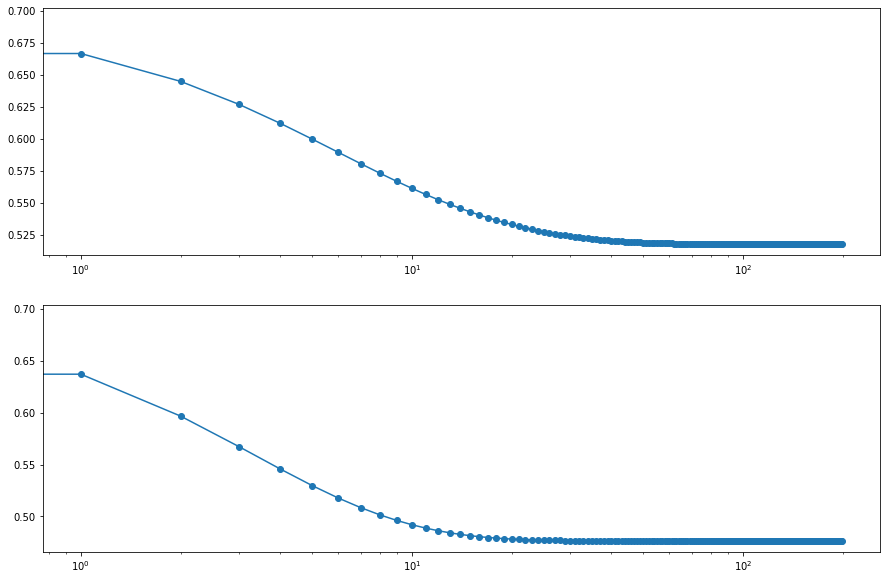

In [7]:
_ = plt.subplot(211)
_ = plt.semilogx(ls1, '-o')
_ = plt.subplot(212)
_ = plt.semilogx(ls2, '-o')

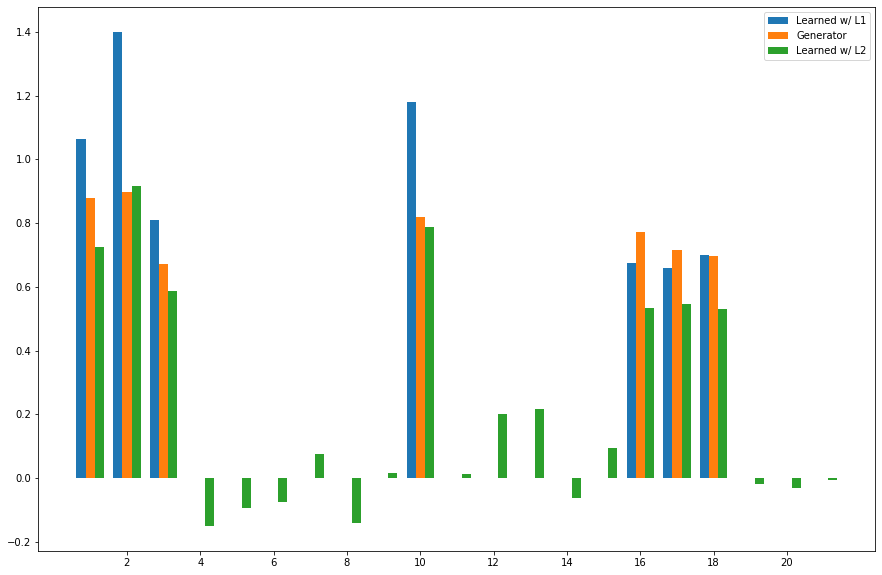

In [8]:
width = 0.25  # the width of the bars
t = np.arange(1, d+1)
fig, ax = plt.subplots()
_ = ax.bar(t - width, u1.flatten(), width, label='Learned w/ L1')
_ = ax.bar(t, w.flatten(), width, label='Generator')
_ = ax.bar(t + width, u2.flatten(), width, label='Learned w/ L2')
_ = ax.set_xticks(t[1::2])
_ = ax.legend()

In [9]:
X, w = gendata(n, d, d)

eta = 1.0 * np.ones(epc)
u1, ls1 = proxgd(X, eta, 0.03, 0)
u2, ls2 = proxgd(X, eta, 0, 0.1)

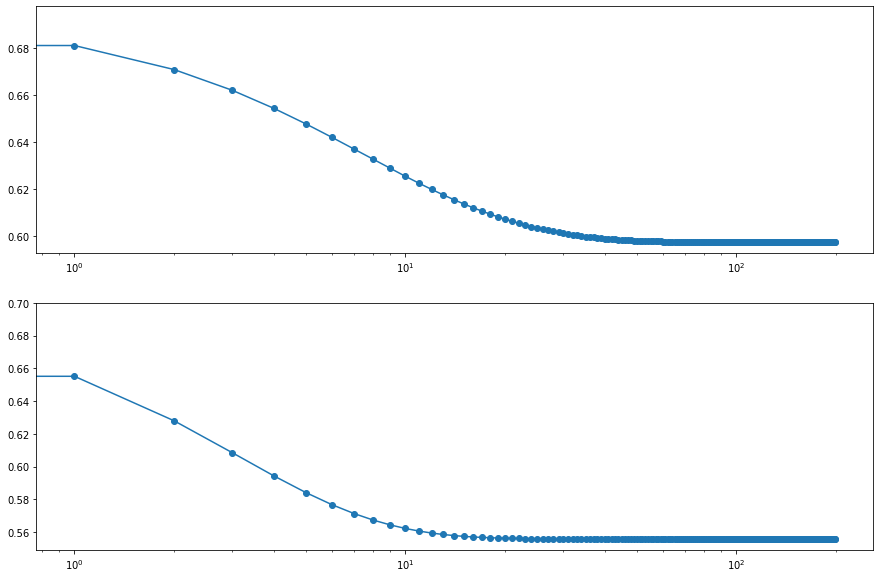

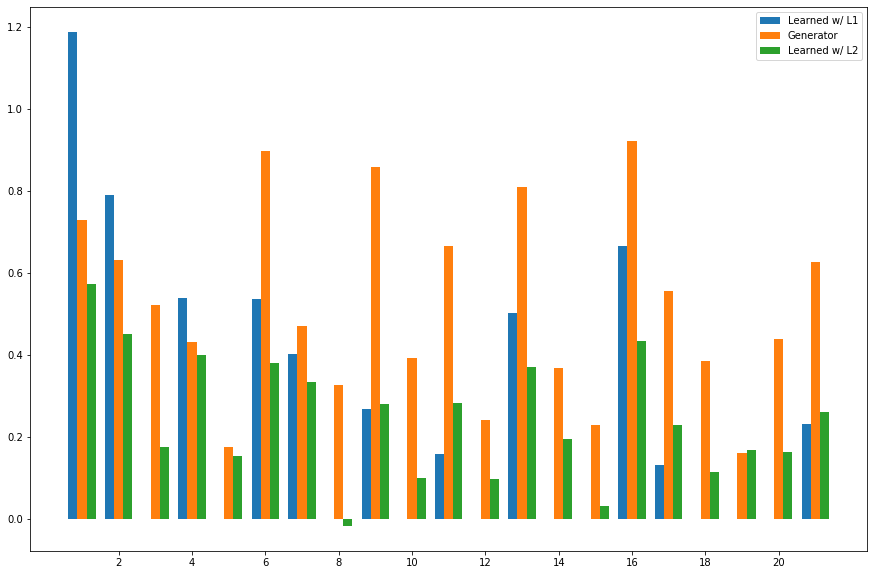

In [10]:
_ = plt.subplot(211)
_ = plt.semilogx(ls1, '-o')
_ = plt.subplot(212)
_ = plt.semilogx(ls2, '-o')

fig, ax = plt.subplots()
_ = ax.bar(t - width, u1.flatten(), width, label='Learned w/ L1')
_ = ax.bar(t, w.flatten(), width, label='Generator')
_ = ax.bar(t + width, u2.flatten(), width, label='Learned w/ L2')
_ = ax.set_xticks(t[1::2])
_ = ax.legend()